# Lending Club Case Study

#### Problem Statement

#### `A consumer finance company which specialises in lending various types of loans to urban customers has to make a decision for loan approval based on the applicant’s profile.`
#### `The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc`

### Data Cleaning

In [446]:
# importing all libraries

import pandas as pd
import numpy as np

In [113]:
loan_df = pd.read_csv('loan.csv')
loan_df.shape

/var/folders/8k/3rgpvcrj5fv1c1s9jm4zd5j80000gn/T/ipykernel_18059/186827586.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_df = pd.read_csv('loan.csv')


(39717, 111)

In [303]:
loan_df['emp_length'].value_counts()

emp_length
10.0    8879
0.0     4583
4.0     4511
2.0     4388
3.0     4095
5.0     3282
1.0     3240
6.0     2229
7.0     1773
8.0     1479
9.0     1258
Name: count, dtype: int64

In [118]:
# Cleaning the emp_length column by removing the characters - +,< and truncating word 'years','year'.

loan_df['emp_length'] = loan_df['emp_length'].apply(clean_emp_length)


In [117]:
# created a function to clean empl_length column values

def clean_emp_length(value):
    if pd.notnull(value):
        if '<' in value:
            return 0
        value = value.replace("+", "").replace("years", "").replace("year", "").strip()
        return int(value)
    return None

In [120]:
# Now checking the emp_length datatype

loan_df['emp_length'].dtype

dtype('float64')

In [250]:
loan_df['emp_length'].median()

4.0

In [127]:
# filling na values with the median

loan_df['emp_length'] = loan_df['emp_length'].fillna(loan_df['emp_length'].median())

In [229]:
loan_df['emp_length'].value_counts()

emp_length
10.0    8879
0.0     4583
4.0     4511
2.0     4388
3.0     4095
5.0     3282
1.0     3240
6.0     2229
7.0     1773
8.0     1479
9.0     1258
Name: count, dtype: int64

In [238]:
# For int_rate column, removing the % character

loan_df['int_rate'] = loan_df['int_rate'].apply(lambda x : x.replace("%",""))

In [245]:
#Change the dtype for int_rate column

loan_df['int_rate'] = loan_df['int_rate'].astype("float64")

In [251]:
loan_df['home_ownership'].value_counts()

home_ownership
RENT        18899
MORTGAGE    17659
OWN          3058
OTHER          98
NONE            3
Name: count, dtype: int64

In [407]:
# Updating home ownership for NONE rows to mode value which is RENT

loan_df['home_ownership'] = loan_df['home_ownership'].apply(lambda x : 'RENT' if x=='NONE' else x)

In [408]:
loan_df['home_ownership'].value_counts()

home_ownership
RENT        18902
MORTGAGE    17659
OWN          3058
OTHER          98
Name: count, dtype: int64

In [17]:
loan_df['verification_status'].value_counts()

verification_status
Not Verified       16921
Verified           12809
Source Verified     9987
Name: count, dtype: int64

### Checking Insights

In [457]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

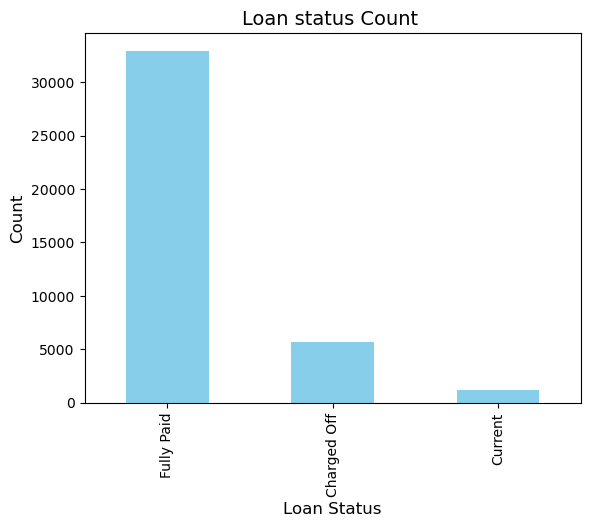

In [462]:
# Insight 1 :  Here we get to know what is the count of borrower's who have full paid the loan, who have defaulted and who are still paying.
ax = loan_df['loan_status'].value_counts().plot.bar(color='skyblue')
ax.set_xlabel('Loan Status', fontsize=12)             
ax.set_ylabel('Count', fontsize=12)         
ax.set_title('Loan status Count ', fontsize=14)  
plt.show()

In [412]:
# Insight 2 : Here we identify what is the loan verification status for the defaulters.

charged_off_count = loan_df[loan_df['loan_status']=='Charged Off']
status_count = charged_off_count['verification_status'].value_counts().reset_index()
status_count.columns = ['Verification_Status','Total_Count']
status_count

,Verification_Status,Total_Count
0,Not Verified,2142
1,Verified,2051
2,Source Verified,1434


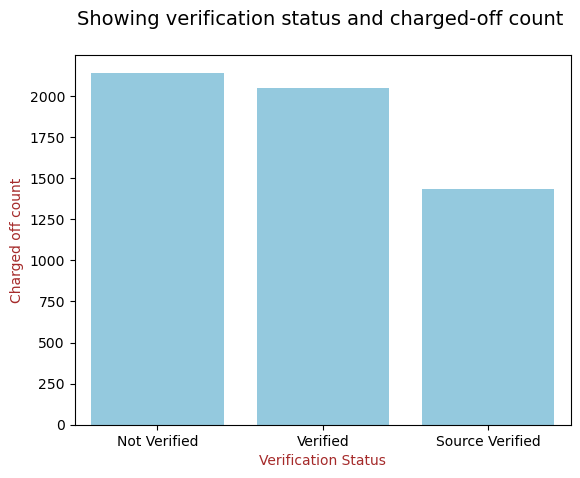

In [465]:
# There is not much difference b/w Verified and Non verified status who defaulted, which is a bit of surprising!!

sns.barplot(data=status_count,x='Verification_Status',y='Total_Count',color='skyblue')
plt.title("Showing verification status and charged-off count \n",fontdict={'fontsize':14})
plt.xlabel("Verification Status",fontdict={'fontsize':10,'fontweight':5,'color':'Brown'})
plt.ylabel("Charged off count",fontdict={'fontsize':10,'fontweight':5,'color':'Brown'})
plt.show()



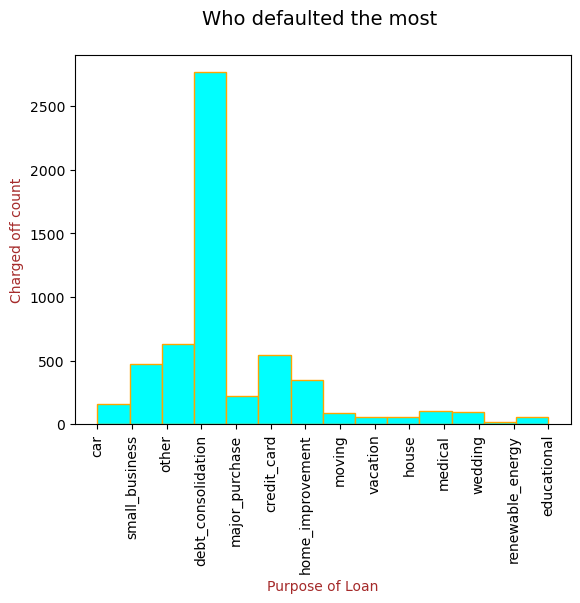

In [466]:
# Insight 3 : debt_consolidation tops the list followed by other and credit card as purpose listed by defaulters.

defaulters_df = loan_df[loan_df['loan_status']=='Charged Off']
defaulters_df.purpose.value_counts()
out1,bins,out2 = plt.hist(defaulters_df.purpose,bins=14,edgecolor='Orange',color='cyan')
plt.xticks(rotation=90)
plt.title("Who defaulted the most \n",fontdict={'fontsize':14})
plt.xlabel("Purpose of Loan",fontdict={'fontsize':10,'fontweight':5,'color':'Brown'})
plt.ylabel("Charged off count",fontdict={'fontsize':10,'fontweight':5,'color':'Brown'})
plt.show()

Text(0, 0.5, 'Frequency')

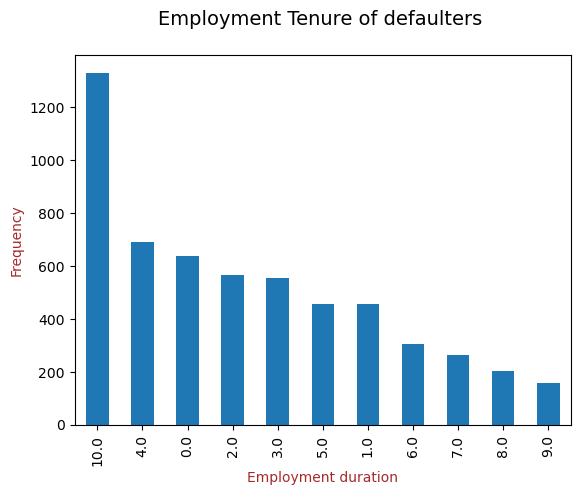

In [467]:
# Insight 4 : Here we see the employment tenure of the defaulters, mostly with 10+ years of employment seems to have defaulted the most.

defaulters_df.emp_length.value_counts().plot.bar()
plt.title("Employment Tenure of defaulters \n",fontdict={'fontsize':14})
plt.xlabel("Employment duration",fontdict={'fontsize':10,'fontweight':5,'color':'Brown'})
plt.ylabel("Frequency",fontdict={'fontsize':10,'fontweight':5,'color':'Brown'})

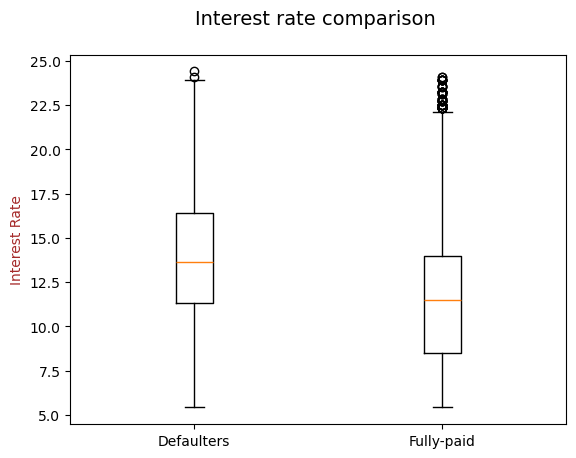

In [468]:
# Insight 5 :  Here we compare what is the median value of interest rates for persons who had fully paid the loan and who has defaulted.
 # Seems the median of interest rate for people who defaulted is somewhere around 13%, while the full paid persons are around 11 and 12.

fully_paid_df = loan_df[loan_df['loan_status']=='Fully Paid']

plt.boxplot([defaulters_df.int_rate,fully_paid_df.int_rate])
plt.title("Interest rate comparison \n",fontdict={'fontsize':14})
plt.ylabel("Interest Rate",fontdict={'fontsize':10,'fontweight':5,'color':'Brown'})
plt.xticks((1,2),["Defaulters","Fully-paid"])
plt.show()

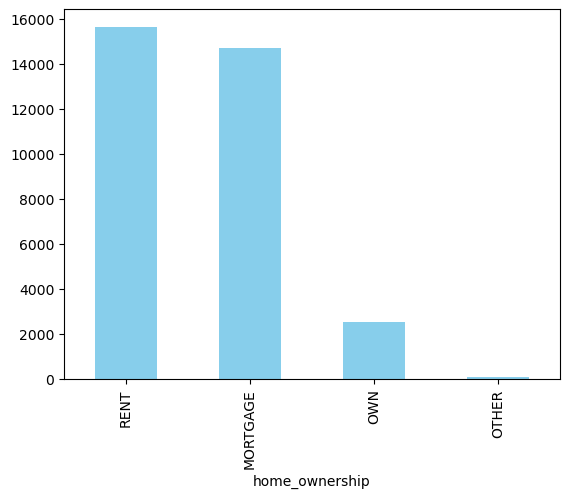

In [470]:
# Insight 6: Here we get to know that most of the the borrowers are having RENT, followed by MORTGAGE
fully_paid_df['home_ownership'].value_counts().plot.bar(color='skyblue')
plt.show()

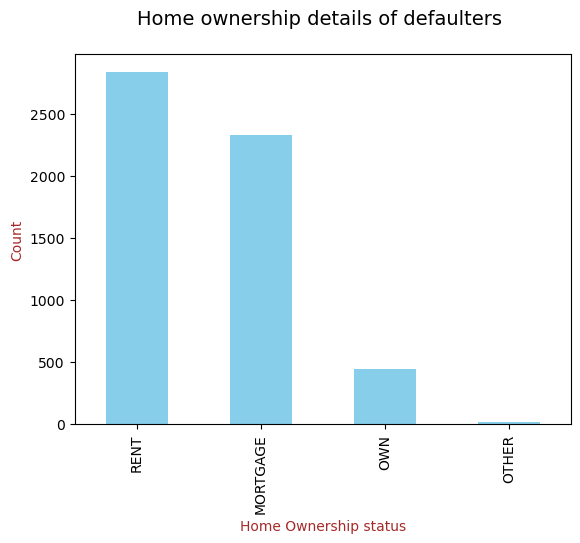

In [472]:
# Insight 7 :  Here we get an insight on the type of ownership of home listed by borrowers who had defaulted.

defaulters_df['home_ownership'].value_counts().plot.bar(color='skyblue')
plt.title("Home ownership details of defaulters \n",fontdict={'fontsize':14})
plt.xlabel("Home Ownership status",fontdict={'fontsize':10,'fontweight':5,'color':'Brown'})
plt.ylabel("Count",fontdict={'fontsize':10,'fontweight':5,'color':'Brown'})
plt.show()

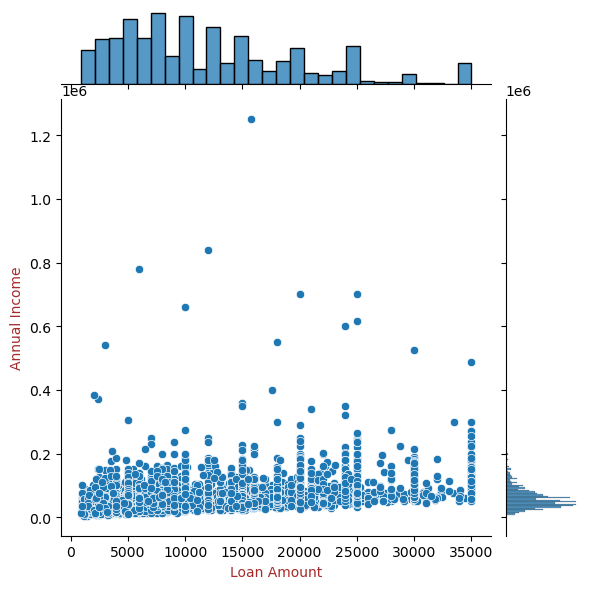

In [473]:
# Insight 8 :  Here , we get insights by comparing the annual income listed by borrowers who defaulted with loan amount they applied.
# Most of them lie within 2,00,000. One outlier which we observe here is when amount is 12,50,000
sns.jointplot(data=defaulters_df,x=defaulters_df['loan_amnt'],y=defaulters_df['annual_inc'])
plt.xlabel("Loan Amount",fontdict={'fontsize':10,'fontweight':5,'color':'Brown'})
plt.ylabel("Annual Income",fontdict={'fontsize':10,'fontweight':5,'color':'Brown'})
plt.show()

In [425]:
# creating a new column for loan funded month and year by extracting year and month from the column - issue_d.

loan_df['issue_d'] = pd.to_datetime(loan_df['issue_d'],format='%b-%y')
loan_df['issue_d_Year'] = pd.DatetimeIndex(loan_df['issue_d']).year
loan_df['issue_d_Month'] = pd.DatetimeIndex(loan_df['issue_d']).month

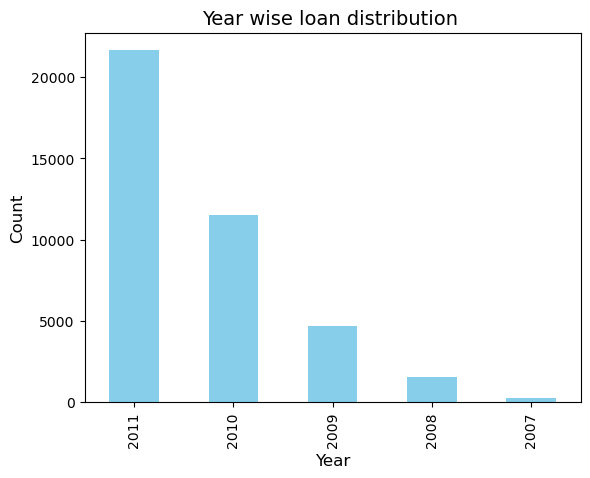

In [433]:
# Insight 9 :  Here we see the year wise loan distribution, 2011 as a year seems to be the year, in which 
# loan applications were funded the most.

ax = loan_df['issue_d_Year'].value_counts().plot.bar(color='skyblue')
ax.set_xlabel('Year', fontsize=12)             
ax.set_ylabel('Count', fontsize=12)         
ax.set_title('Year wise loan distribution ', fontsize=14)  
plt.show()

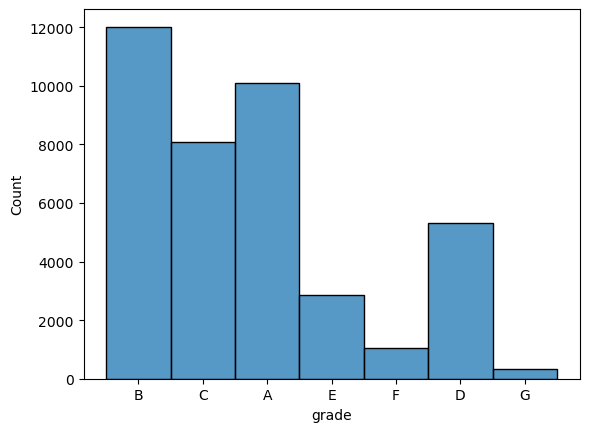

In [449]:
# Insight 10 : Here we can see the count of grade of loans which were funded. Most loans were of Grade B, followed by A.
sns.histplot(data=loan_df, x='grade')
plt.show()

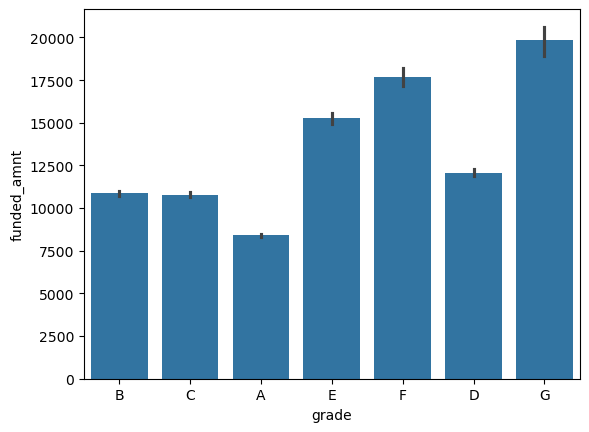

In [451]:
# Insight 11 : Here we compare the funded amount with the grade associated with the loan.
# Most funded grade is  G.

sns.barplot(loan_df,x='grade',y='funded_amnt')
plt.show()

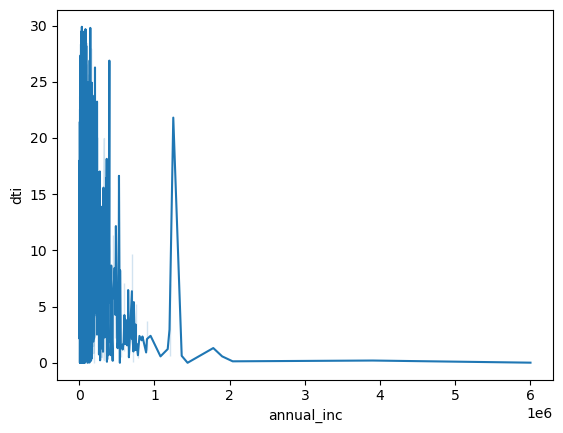

In [481]:
sns.lineplot(data=loan_df, x='annual_inc', y='dti')
plt.show()